### Tree-based Machine Learning Models
In this jupyter notebook, we will practice the topics covered in the lectures. Specifically, we will do hands-on practice of:
- load and prepare data for machine learning model training
- train and test tree-based models (decision tree classifier/regressor, randomforest classifier/regressor)
- visualize and interpret model performance

In [4]:
# packages for data 
import numpy as np
import pandas as pd
from collections import Counter

# packages for machine learning 
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz 

# packages for plot and visualization
import matplotlib.pyplot as plt
from matplotlib import pylab
import graphviz 
pylab.rcParams["figure.figsize"] = (5.0, 4.0)
%matplotlib inline

In the following tasks, we will implement several tree-based models using Python3 and scikit-learn: https://scikit-learn.org/stable/. Let's first check the version of python and sklearn.

In [5]:
# Check your python version, we need Python3 to run the following code
from platform import python_version
print(python_version())

3.11.5


In [6]:
# Check the version of your sklearn package
# In coding and debugging, make sure you refer to the **correct version of the documentation**
sklearn.__version__

'1.3.2'

### Train and Test a Decision Tree classifier

In this task, we will load a dataset, train a decision tree classifier on the training set, and test the classifier performance on the testing set. Here are the suggested steps: <br>
1. Import the necessary packages. <br>

**Prepare data**<br><br>
2. <u>_Load_</u> the iris dataset. <br>
    ---> More information about the dataset can be found here: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html.<br>
3. Prepare the <u>_input feature matrix and the target variable_</u>. Then, split data into training and testing set.
<br><br>

**Model training and evaluation**<br>
4. Create a DecisionTreeClassifier object. <br>
    ---> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html. <br>
    ---> Let's set criterion = "entropy" and random_state = 42, and keep all the other parameters with the default value.<br>
5. <u>_Fit_</u> the DecisionTreeClassifier on the training set.<br>
6. <u>_Evaluate_</u> the DecisionTreeClassifier performance using the "score" function on the testing set. 
<br><br>

**Visualization and result analysis** <br>
7. Visualize the fitted DecisionTreeClassifier and interpret its performance. <br>
    ---> More information on plotting decision trees can be found here: https://scikit-learn.org/stable/modules/tree.html
<br><br>

**Exploration**<br>
8. Finally, play with different values of model parameters. Explore how the model performance change with different parameter settings and how the visualized trees change.<br>

In [7]:
# 1. import related packages
from sklearn.datasets import load_iris

#### Prepare data

In [8]:
# 2. load the dataset
iris = load_iris()

In [9]:
# 2. display the dataset as a pandas dataframe
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
# if the target variable is discrete, check the label distribution of the target variable
Counter(df_iris.target)

Counter({0: 50, 1: 50, 2: 50})

In [11]:
# 3. Get the input feature matrix and target variable, prepare for model fitting
X,y = iris.data, iris.target
X.shape, y.shape

((150, 4), (150,))

In [12]:
# 3. split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((105, 4), (45, 4))

#### Model training and evaluation

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
# 4. Create a DecisionTreeClassifier object.  
# set criterion = "entropy" and random_state = 42, and keep all the other parameters with the default value.
dt_clf = DecisionTreeClassifier(random_state=42, criterion='entropy') 

In [15]:
# 5. "fit" the DecisionTreeClassifier on the training set
dt_clf = dt_clf.fit(X_train, y_train)

In [16]:
# 6. Evaluate the DecisionTreeClassifier performance on the testing set
# Round it to the 3rd decimal (e.g., 0.800, 0.850, 0.862).
np.round(dt_clf.score(X_test,y_test), 3) # this result shows the percentage that the model has correctly predicted

0.978

#### Visualization and result analysis

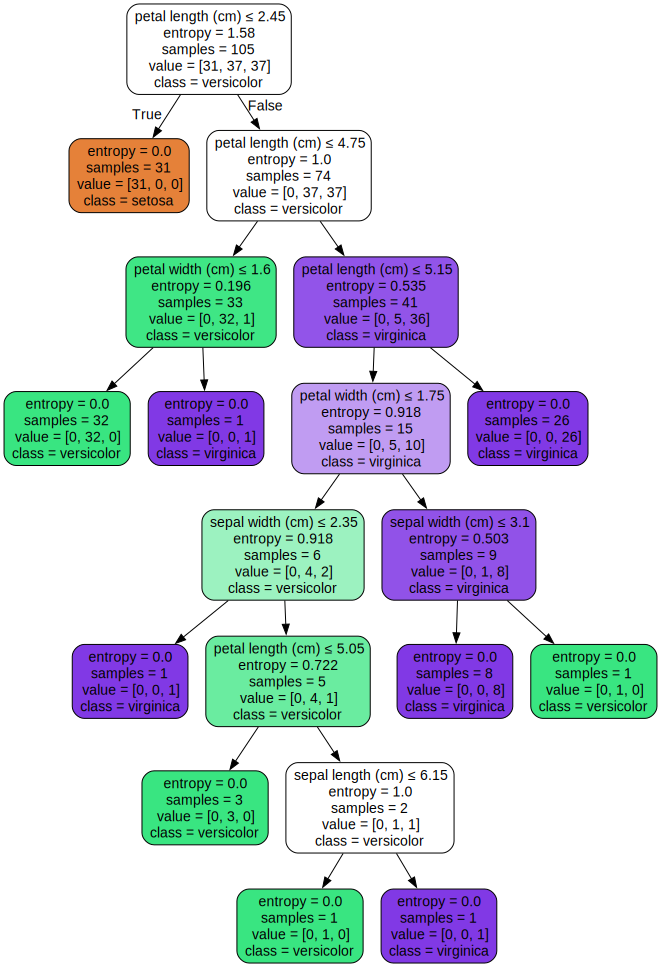

In [17]:
# 7. Visualize the fitted DecisionTreeClassifier
# conda install python-graphviz
dot_data = tree.export_graphviz(dt_clf, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [18]:
# check and interpret feature importance
pd.DataFrame([np.round(dt_clf.feature_importances_,2)], columns=iris.feature_names)
'''
dt_clf.feature_importances_: This attribute of the decision tree model contains the importance of each feature
as used in making decisions. The importance is calculated based on how much each feature contributes to reducing
the criterion (e.g., entropy or Gini impurity) across all trees.
'''

'\ndt_clf.feature_importances_: This attribute of the decision tree model contains the importance of each feature\nas used in making decisions. The importance is calculated based on how much each feature contributes to reducing\nthe criterion (e.g., entropy or Gini impurity) across all trees.\n'

In [19]:
# depth of the fitted tree
dt_clf.get_depth() # a depth of a tree means the steps from root node to the final leaf

7

In [20]:
# number of leaves in the fitted tree: nodes that have no further son leaves
dt_clf.get_n_leaves()

10

In [21]:
# predict the class labels for the given samples
# this predicts the first 10 samples from the test dataset
dt_clf.predict(X_test[:10])

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [22]:
# predict the class probabilities for the given samples
dt_clf.predict_proba(X_test[:10])
'''
The output is a matrix, where each row corresponds to a sample and each column represents the probability
that the sample belongs to a specific class.
'''

'\nThe output is a matrix, where each row corresponds to a sample and each column represents the probability\nthat the sample belongs to a specific class.\n'

In [23]:
'''
The input is the first sample in the test dataset.
The output is a sparse matrix that represents the path taken from the root node to the leaf in the decision tree.
'''
dt_clf.decision_path(X_test[:1]).toarray()

array([[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

#### Exploration

In [24]:
# 8. Finally, play with different parameter settings and explore how the model performance changes.
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Visualize and compare different decision trees.



In [25]:
# list all the attributes and methods
# dir(dt_clf)

In [26]:
# help(dt_clf)

#### Discussion

The fitted decision tree classifier is: <br>
   - a tree with depth of 7  
   - it achieved 0.978 accuracy on the testing set
   - petal length is the most important feature in distinguishing samples of three classes, this makes sense because ...(provide some biological explaination)
   - sepal length seems to be the most unimportant feature because ... (provide some biological explaination)

After exploring different parameter settings, we find that:
   - max_depth helps control the maximum depth of the tree and thus avoids overfitting,...
   - min_samples_split sets a threshold on the minimum number of samples required to split an internal node, and this prevents the tree to grow too complex,...
   - ...

### Decision tree regressor
- Please follow the previous steps of building, evaluating, and visualizing decision tree classifier to build a decision tree regressor with the diabetes dataset. 
    - Decision tree regressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
    - Diabetes dataset: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
- Visualize to show how decision tree regressor is different from decision tree classifier.
    

In [27]:
# 1. import the additional related packages
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor

In [34]:
# 2. load the dataset
diab = load_diabetes()
type(diab)

sklearn.utils._bunch.Bunch

In [29]:
# 2. display the dataset as a pandas dataframe
df_diab = pd.DataFrame(diab.data, columns=diab.feature_names)
df_diab['target'] = diab.target
df_diab

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Text(0, 0.5, '#samples')

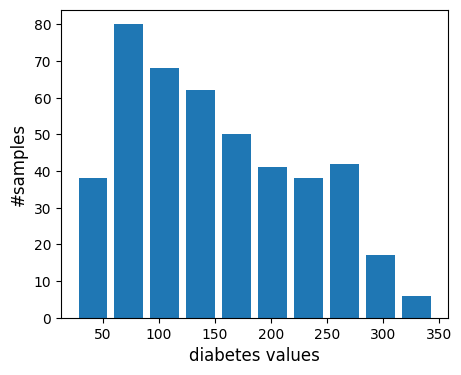

In [31]:
# if the target variable is continuous, check the value distribution of the target variable
plt.hist(df_diab.target, rwidth=0.8);
plt.xlabel('diabetes values', fontsize=12)
plt.ylabel("#samples", fontsize=12)

In [32]:
# 3. Get the input feature matrix and target variables, prepare for model fitting
X,y = diab.data, diab.target
X.shape, y.shape

((442, 10), (442,))

In [35]:
# 3. split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((309, 10), (133, 10))

In [56]:
# 4/5/6: fit the model on the training set and and evaluate the model performance on the testing set

# Create a DecisionTreeRegressor object
dt_reg = DecisionTreeRegressor(random_state = 42, criterion = 'squared_error')

# Fit the DecisionTreeClassifier on the training set
dt_reg = dt_reg.fit(X_train, y_train)

# Evaluate the DecisionTreeClassifier performance on the testing set
np.round(dt_reg.score(X_test, y_test), 2)

-0.06

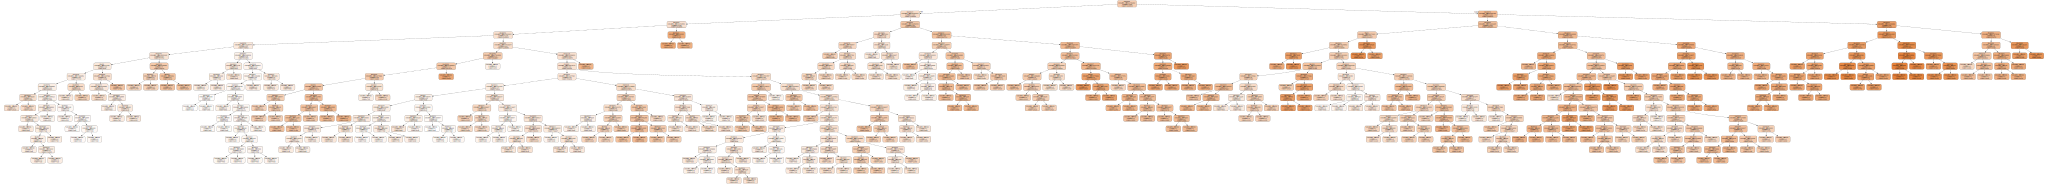

In [61]:
# 7. Visualize the fitted DecisionTreeRegressor
dot_data_dbt = tree.export_graphviz(dt_reg, out_file=None, 
                                    filled=True, rounded=True,
                                    special_characters=True)

graph_dbt = graphviz.Source(dot_data_dbt)
graph_dbt

In [62]:
# check and interpret feature importance
pd.DataFrame([np.round(dt_reg.feature_importances_,2)], columns = diab.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.06,0.0,0.44,0.1,0.07,0.07,0.03,0.03,0.13,0.06


In [63]:
# depth of the fitted tree
dt_reg.get_depth()

17

In [65]:
# number of leaves in the fitted tree
dt_reg.get_n_leaves()

303

In [66]:
# predict the regression value for the given samples
dt_reg.predict(X_test[:10])

array([198., 221., 198., 310., 139., 253., 233., 249., 131., 128.])

In [ ]:
# 8. Finally, play with different parameter settings and explore how model performance changes. 
# Visualize and compare different decision trees.


In [ ]:
# list all the attributes and methods
# dir(dt_clf)

In [ ]:
# help(dt_clf)

#### Discussion
- compare decision tree classifier and regressor, what differences do you observe?
- what parameter settings have you explored and how does each parameter affect the regressor performance?
- can you interpret the feature importance under the context of this task?
- what else do you find interesting?

### Random Forest classifer/regressor [take-home assignment, update to your github repo]
For a random forest classifier:
- use the prepared iris dataset (X_train, y_train, X_test, y_test) 
- train a [RandomForestClassifier] on the training set
    - (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- report the model performance on the testing set
- compare the performance of a decision tree classifier and a random forest classifier 

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
# train a random forest classier
# set n_estimators = 1000, criterion = 'entropy', random_state = 42, and keep all the other parameters with the default value.
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_iris = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
rf_iris = rf_iris.fit(X_train, y_train)

In [73]:
# evaluate the random forest classifier on test set (round to the 3rd decimal, e.g., 0.971, 0.020)
np.round(rf_iris.score(X_test, y_test),3)

1.0

In [99]:
# try different model parameters (e.g., n_estimators) and check the results
rf_iris = RandomForestClassifier(n_estimators = 2, criterion = 'entropy', max_depth = 5, random_state = 42)
rf_iris = rf_iris.fit(X_train, y_train)
np.round(rf_iris.score(X_test, y_test),3)

0.978

#### Discussion
After comparing decision tree classifier and random forest classifier, share your thoughts and insights. E.g.,
- which performed better?
- how does model parameter affect the model performance in the random forest classifier?

In general, random forest classifier performs better than decision tree classifier. When "n_estimators" is set to 1, the score of random forest classifier is 0.889; when set to 2, it is 0.978, equal to the score of decision tree classifier; when set to 3 and above, the score is 1.0. The lower the "max_depth" allowed, the harder it is for random forest classifier to predict.

### [Optional challenge] take-home practice

The following part provides a practice of calculating entropy and information gain from scratch. You can refer to the slides to review these concepts. 

For each of the designed function, we provide the function header, docstring, and expected results for the running examples. You can use the running example to check the correctness of your code. We have included all the necessary packages, but you are free to add any additional package when necessary. <br>

In [35]:
def get_proportion(ct):
    """
    Calculate the class distribution based on the number of samples in each class.
    ct: a list of integers indicating the number of samples in each class
        binary class: ct = [ct1, ct2]
        multi-class: ct = [ct1, ct2, ...]
    return: a list/array of numbers indicating the proportions of samples in each class
    """
    ### your code here
    

In [36]:
get_proportion([5,5])

array([0.5, 0.5])

In [37]:
get_proportion([3,2])

array([0.6, 0.4])

In [38]:
def calculate_entropy(prop):
    """
    Calculate the entropy at each node.
    prop: a list of numbers indicating the proportion of samples in each class
        binary case: [p, 1-p]
        multi-class cases: [p1, p2, ...pn], where p1 + p2 + ... + pn = 1
    return:
        a float representing the entropy for the current sample distribution
        please round to 3 digits after the decimal point 
    """
    ### your code here
    

In [39]:
calculate_entropy([0.5,0.5])

1.0

In [40]:
calculate_entropy([0.6,0.4])

0.971

In [41]:
calculate_entropy(get_proportion([3,5,2]))

1.485

In [42]:
def calculate_IG(root_counts, leaves_counts):
    """
    Calculate information gain of splitting on a specific feature.
    root_counts:
        a list if integers indicating the number of samples for each class at the root node
        e.g., root_counts = [3,2]
    leaves_counts:
        a list of lists, each sublist shows the sample distribution at each leaf node
        E.g., in the slides, if we split on X1, leaves_counts = [[2,1],[1,1]]
    return: 
        a float indicating the information gain of splitting on the current decision node:
        please round to the 3rd decimal, e.g., 0.971, 0.020
    note: 
        you will use the above helper functions in the calculation
    """
    ### your code here
    

In [43]:
# running example for spliting on X1
calculate_IG([3,2], [[2,1], [1,1]])

0.02

In [44]:
# running example for spliting on X2
calculate_IG([3,2], [[2,2], [1,0]])

0.171

In [45]:
# running example for spliting on X3
calculate_IG([3,2], [[3,0], [0,2]])

0.971

In [46]:
# running example for spliting on Outlook
calculate_IG([9,5], [[2,3], [4,0], [3,2]])

0.246